# **Hotel Booking EDA**
---

*May 16, 2022*

## **Library**
---

In [1]:
# Load libraries
from rich.jupyter import print # Print format
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import plotly.express as px
import warnings

# %matplotlib inline
warnings.filterwarnings("ignore") # No warnings

# Theme setting
THEME = {
    "Title color": "blue on white",
    "Main color": "cyan",
    "Background color": "white",
    "sns": "Blues_r",
    "sns1": "Blues"
}

# Save figure
SAVEFIG = False

# Quick variables
MONTH = [
    "January", "February", "March", "April", "May",
    "June", "July", "August", "September", "October",
    "November", "December"
]

print(f"[{THEME['Main color']}][b]Setup Done![/]")

Setup Done!

## **Load data into the dataframe:**
---

In [2]:
pd.set_option("display.max_columns", None) # Show all cols
data = pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data_bk = data.copy() # make backup - optional

## **Overview:**
---

In [3]:
# Variables explaination

var_name = {
    "hotel": "The names of the hotel are [b]City Hotel[/b] and [b]Resort Hotel[/b]",
    "is_canceled": "Value indicating if the booking was canceled (1) or not (0)",
    "lead_time": "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date",
    "arrival_date": "Information of the arrival date",
    "stay in_weekend_nights": "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel",
    "stay in_week_nights": "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel",
    "adults/children/babies": "Number of adults/children/babies",
    "meal": "Type of meal booked.\nCategories:\n\t[b]Undefined/SC[/] – no meal package\n\t[b]BB[/] – Bed & Breakfast\n\t[b]HB[/] – Half board (breakfast and one other meal – usually dinner)\n\t[b]FB[/] – Full board (breakfast, lunch and dinner)",
    "country": "Country of origin (ISO 3155–3:2013 format)",
    "market_segment": "Market segment designation.\nIn categories, the term [b]'TA'[/] means [b]'Travel Agents'[/] and [b]'TO'[/] means [b]'Tour Operators'[/]",
    "distribution_channel": "Booking distribution channel.\nThe term [b]'TA'[/] means [b]'Travel Agents'[/] and [b]'TO'[/] means [b]'Tour Operators'[/]",
    "is_repeated_guest": "Value indicating if the booking name was from a repeated guest (1) or not (0)",
    "previous_cancellations": "Number of previous bookings that were cancelled by the customer prior to the current booking",
    "previous_bookings_not_canceled": "Number of previous bookings not cancelled by the customer prior to the current booking",
    "agent": "[b]ID[/] of the travel agency that made the booking",
    "company": "[b]ID[/] of the company/entity that made the booking or responsible for paying the booking",
    "required_car_parking_spaces": "Number of car parking spaces required by the customer",
    "reservation_status_date": "Date at which the last status was set",
    "adr": "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights"
}

# Print
print(f"[b][{THEME['Title color']}]Variables Explaination:\n")
for i, (k, v) in enumerate(var_name.items()):
  print(f"[b][{THEME['Title color']}]{i+1}.[/] [b]{k}:[not bold] [{THEME['Main color']}]{v}[/]\n")

Variables Explaination:

1. hotel: The names of the hotel are City Hotel and Resort Hotel

2. is_canceled: Value indicating if the booking was canceled (1) or not (0)

3. lead_time: Number of days that elapsed between the entering date of the booking into the 
PMS and the arrival date

4. arrival_date: Information of the arrival date

5. stay in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or 
booked to stay at the hotel

6. stay in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked 
to stay at the hotel

7. adults/children/babies: Number of adults/children/babies

8. meal: Type of meal booked.
Categories:
        Undefined/SC – no meal package
        BB – Bed & Breakfast
        HB – Half board (breakfast and one other meal – usually dinner)
        FB – Full board (breakfast, lunch and dinner)

9. country: Country of origin (ISO 3155–3:2013 format)

10. market_segment: Market segment designation.
In categories, the term 'TA' means 'Travel Agents' and 'TO' means 'Tour Operators'

11. distribution_channel: Booking distribution channel.
The term 'TA' means 'Travel Agents' and 'TO' means 'Tour Operators'

12. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or 
not (0)

13. previous_cancellations: Number of previous bookings that were cancelled by the customer 
prior to the current booking

14. previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer
prior to the current booking

15. agent: ID of the travel agency that made the booking

16. company: ID of the company/entity that made the booking or responsible for paying the 
booking

17. required_car_parking_spaces: Number of car parking spaces required by the customer

18. reservation_status_date: Date at which the last status was set

19. adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the
total number of staying nights

In [4]:
# First look - Overview
_mv = data.isna().sum().sum() # Total missing values
_to = data.shape[0]*data.shape[1] # Total observations

print(f"""\
[b]Data Overview:[/b]
- Rows: {data.shape[0]:,.0f}
- Columns: {data.shape[1]:,.0f}
- Missing values: {_mv:,.0f} 
- Missing values (%): {_mv/_to*100:,.2f} 
""")

Data Overview:
- Rows: 119,390
- Columns: 32
- Missing values: 129,425 
- Missing values (%): 3.39

In [7]:
data.info() # Quick info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Quick describe
data[data.select_dtypes(exclude="object").columns].describe().T.style.background_gradient(axis=0, cmap=THEME["sns1"])

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.000000,0.370416,0.482918,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,119390.000000,104.011416,106.863097,0.000000,18.000000,69.000000,160.000000,737.000000
arrival_date_year,119390.000000,2016.156554,0.707476,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_week_number,119390.000000,27.165173,13.605138,1.000000,16.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,119390.000000,15.798241,8.780829,1.000000,8.000000,16.000000,23.000000,31.000000
stays_in_weekend_nights,119390.000000,0.927599,0.998613,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,119390.000000,2.500302,1.908286,0.000000,1.000000,2.000000,3.000000,50.000000
adults,119390.000000,1.856403,0.579261,0.000000,2.000000,2.000000,2.000000,55.000000
children,119386.000000,0.103890,0.398561,0.000000,0.000000,0.000000,0.000000,10.000000
babies,119390.000000,0.007949,0.097436,0.000000,0.000000,0.000000,0.000000,10.000000


## **Data Cleaning:**
---

### **Missing values analysis**

In [13]:
# Filter column with missing values and count it
print(data.isna().sum().sort_values(ascending=False)[data.isna().sum()!=0])

company     112593
agent        16340
country        488
children         4
dtype: int64

As you can see on the figure, only `company`, `agent`, `country`, and `children` have missing values

In [14]:
# In percentage
_ROUND_NUM = 5 # Round up setting
print(((data.isna().sum()/len(data)).round(_ROUND_NUM)*100).sort_values(ascending=False)[(data.isna().sum()/len(data))*100!=0])

company     94.307
agent       13.686
country      0.409
children     0.003
dtype: float64

Missing values in percentage form

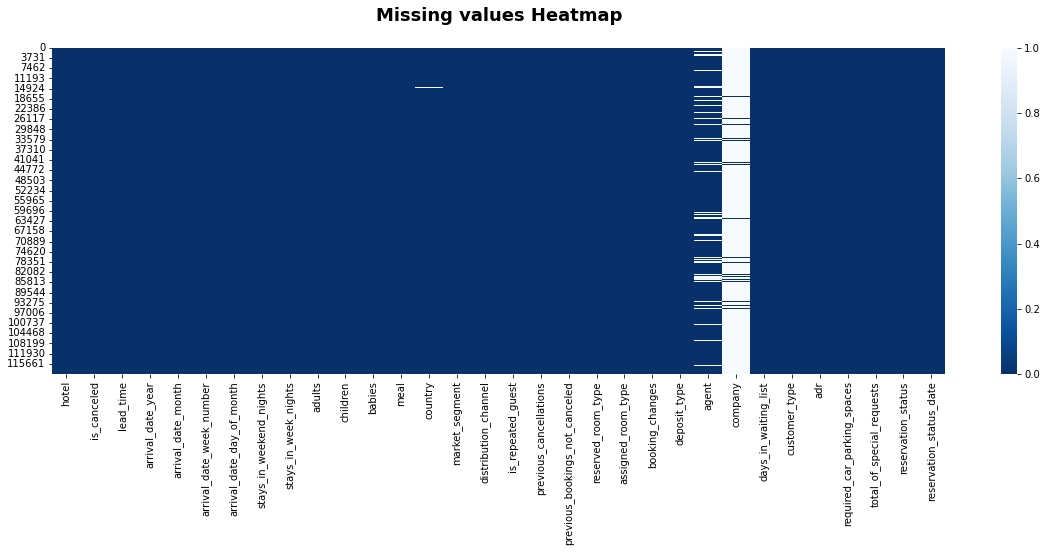

In [15]:
plt.figure(figsize=(20,6))
plt.title(
    "Missing values Heatmap\n",
    fontweight="bold",
    fontsize=18
)
sns.heatmap(data.isna(), cmap=THEME["sns"])
if SAVEFIG: plt.savefig("hm.png", dpi=300)
plt.show()

**In brief, there are missing values in column `company`, `agent`, `country`, and `children`. On top of that, `company` column has the most missing values (94.3%).**

### **Cleaning**

In [16]:
# Replace missing value in country with mode
data.country.fillna(data.country.mode()[0], inplace=True)

# Replace missing value in children with mode
data.children.fillna(data.children.mode()[0], inplace=True)

# Replace missing value in agent with 0
data.agent.fillna(0, inplace=True)

# Replace missing value in company with 0
data.company.fillna(0, inplace=True)

# Check
if data.isna().sum().sum()==0:
  print(f"[b][{THEME['Main color']}]No missing values left!")
else:
  print(f"[b][{THEME['Main color']}]There exist missing value(s)")

No missing values left!

In [17]:
# In data.meal contains value "Undefined" which equal to "SC"
# => Replace "Undefined" with "SC"
data.meal.replace("Undefined", "SC", inplace=True)

# Remove unmeaningful data
data = data[data.adults != 0] # No adults per reservation
data = data[data.adr > 0.00] # No Average Daily Rate
print(f"[b][{THEME['Main color']}]Data cleaned!")

Data cleaned!

In [18]:
# Convert to datetime
data.reservation_status_date = pd.to_datetime(data.reservation_status_date)


# Add total nights stayed column into dataframe
data["total_nights"] = data.stays_in_weekend_nights + data.stays_in_week_nights


# Add full arrival date and convert into datetime
def tmonth_to_num(month:str):
  """Convert month (text form) to number"""
  for i, x in enumerate(MONTH):
    if month.startswith(x):
      if i < 9:
        return f"0{i+1}"
      else:
        return f"{i+1}"
  raise SystemExit("Invalid month")

data["arrival_date"] = data.arrival_date_year.astype(str) + "-" +\
                       data.arrival_date_month.astype(str).\
                       apply(tmonth_to_num) + "-" + data.arrival_date_day_of_month.astype(str)
data.arrival_date = pd.to_datetime(data.arrival_date)


# Add total guest
data.children = data.children.astype(int) # Convert to int
data["total_guest"] = data.adults + data.children # Assume babies are free of charge


# Add price per person
data["price_per_guest"] = data.adr / data.total_guest

# Group data
monthly_data = data.groupby(pd.Grouper(key="arrival_date", axis=0, freq="M")).sum() # group data by month - maybe unused
yearly_data = data.groupby(pd.Grouper(key="arrival_date", axis=0, freq="Y")).sum() # group data by year - maybe unused

# Check
print(f"[b][{THEME['Main color']}]Done!")

Done!

In [19]:
_mv = data.isna().sum().sum()
print(f"""\
After cleaning, there is/are {_mv} missing value(s)
and {data.shape[0]:,.0f} rows.""")

After cleaning, there is/are 0 missing value(s)
and 117,182 rows.

## **Exploratory Data Analysis (EDA):**
---

### **Supporting Functions**

In [20]:
def sns_show_values(axs, orient="v", space=.01, fontsize=14, roundup=True):
  def _single(ax):
    if orient == "v":
      for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        # value = "{:.1f}".format(p.get_height())
        if roundup:
          value = f"{p.get_height():.0f}"
        else:
          value = f"{p.get_height():.1f}"
        ax.text(_x, _y, value, ha="center", fontsize=fontsize) 
    elif orient == "h":
      for p in ax.patches:
        _x = p.get_x() + p.get_width() + float(space)
        _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
        # value = "{:.1f}".format(p.get_width())
        if roundup:
          value = f"{p.get_width():.0f}"
        else:
          value = f"{p.get_width():.1f}"
        ax.text(_x, _y, value, ha="left", fontsize=fontsize)

  if isinstance(axs, np.ndarray):
    for idx, ax in np.ndenumerate(axs):
      _single(ax)
  else:
    _single(axs)


def get_country_name(short_name:str):
  """Quick function convert country name
  from ISO 3166-1 format to normal name"""
  if short_name is None:
    # raise SystemExit("Country not in database!")
    return "Unknown"
  for country in list(pycountry.countries):
    if country.alpha_3.upper().startswith(short_name):
      return country.name
  # raise SystemExit("Country not in database!")
  return "Unknown"

### **Hotel Reservation**

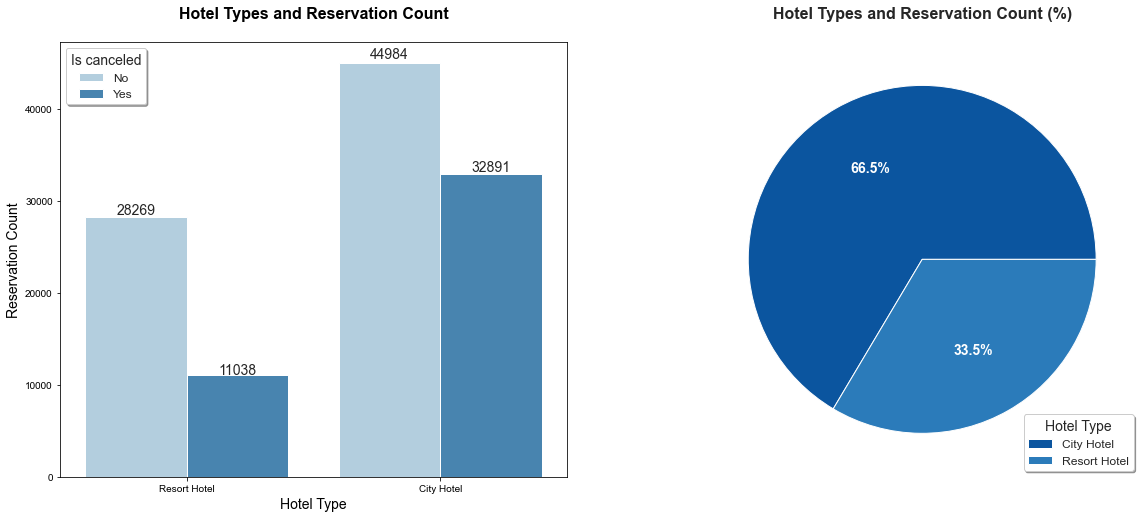

In [21]:
plt.figure(figsize=(20, 8))

# Fig 01
plt.subplot(1, 2, 1)
sns.set_style("whitegrid")
temp = sns.countplot(
    data=data,
    x="hotel",
    hue="is_canceled",
    palette=THEME["sns1"],
)
sns_show_values(temp, roundup=True)
plt.title(
    "Hotel Types and Reservation Count\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Reservation Count", fontsize=14)
plt.legend(
    ["No", "Yes"],
    title="Is canceled",
    shadow=True,
    fontsize=12,
    title_fontsize=14,
    loc="upper left"
)

# Fig 02
plt.subplot(1, 2, 2)
plt.pie(
    data.hotel.value_counts(),
    autopct="%.1f%%",
    colors=sns.color_palette(THEME["sns"]),
    textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}
)
plt.title(
    "Hotel Types and Reservation Count (%)\n",
    fontweight="bold", fontsize=16
)
plt.legend(
    ["City Hotel", "Resort Hotel"],
    title="Hotel Type", shadow=True,
    loc="lower right",
    fontsize=12,
    title_fontsize=14
)
if SAVEFIG: plt.savefig("rev1.png", dpi=300)
plt.show()

City Hotel have around double the number of reservations than Resort Hotel (66.5% and 33.5% respectively)

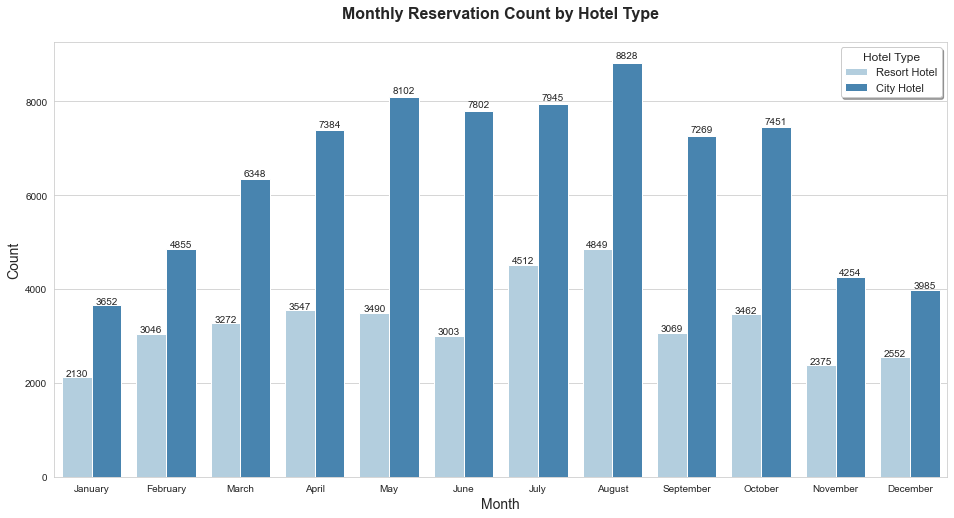

In [22]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
temp = sns.countplot(
    data=data, 
    x="arrival_date_month", 
    hue="hotel",
    order=MONTH,
    palette=THEME["sns1"]
)
sns_show_values(temp, fontsize=10, roundup=True)
plt.title(
    "Monthly Reservation Count by Hotel Type\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(
    title="Hotel Type",
    shadow=True,
    loc="best",
    fontsize=11,
    title_fontsize=12
)
if SAVEFIG: plt.savefig("rev2.png", dpi=300)
plt.show()

Both City Hotel and Resort Hotel reservations peak in August (8983 and 4894 respectively) and have the lowest in January (3736 and 2193 respectively). March through October seems to be their busiest window for the year. Reservations fall in from November to January.

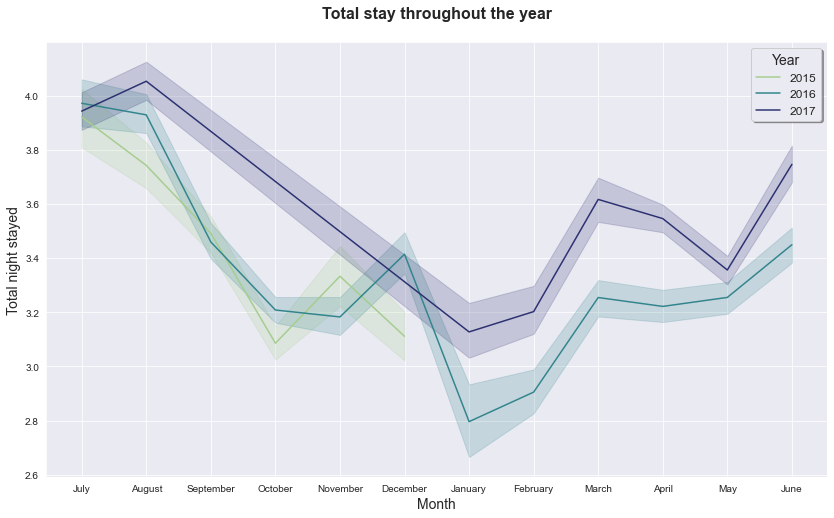

In [23]:
plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.lineplot(
    x="arrival_date_month",
    y="total_nights",
    hue="arrival_date_year",
    data=data,
    palette="crest",
)
plt.title(
    "Total stay throughout the year\n",
    fontweight="bold",
    fontsize=16
)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total night stayed", fontsize=14)
plt.legend(
    title="Year",
    shadow=True,
    loc="best",
    fontsize=12,
    title_fontsize=14
)
if SAVEFIG: plt.savefig("rev3.png", dpi=300)
plt.show()

From July to August attract more guests with averagely 4 nights per stay.

In [24]:
# Make separated country data
country_data = pd.DataFrame(
    data.loc[data["is_canceled"] == 0]["country"].value_counts()
)
country_data.rename(
    columns={"country": "Number of Guests"},
    inplace=True
)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] \
                                    / total_guests * 100, 2)
country_data["country"] = country_data.index
# country_data["country_f"] = country_data["country"].apply(get_country_name)
country_data_f = country_data.copy() # Make copy
# Get full country name and filter out
country_data_f["country_f"] = country_data_f["country"].apply(get_country_name)
country_data_f.loc[country_data_f["Guests in %"] < 2, "country_f"] = "Other"

# Pie chart
temp = px.pie(
    country_data_f,
    values="Number of Guests",
    names="country_f",
    title="Home country of guests",
    color_discrete_sequence=px.colors.sequential.Blues_r,
    hole=.3,
    labels={"country_f": "Country"}
)
temp.update_traces(
    textposition="inside",
    textinfo="value+percent+label"
)
temp.update_layout(
    font=dict(size=16),
    annotations=[
        dict(text="Country", x=0.5, y=0.5,
             font_size=20, showarrow=False)
    ]
)
temp.show()

In [25]:
# Map version
temp = px.choropleth(
    country_data,
    locations=country_data.index,
    color=country_data["Guests in %"], 
    hover_name=country_data.country.apply(get_country_name), 
    color_continuous_scale=px.colors.sequential.Blues,
    title="Home country of guests"
)
temp.update_layout(font=dict(size=16))
temp.show()

People from all over the world are staying in these two hotels. Most of the guests are from Portugal (occupied around 27.4%) and other countries in Europe.

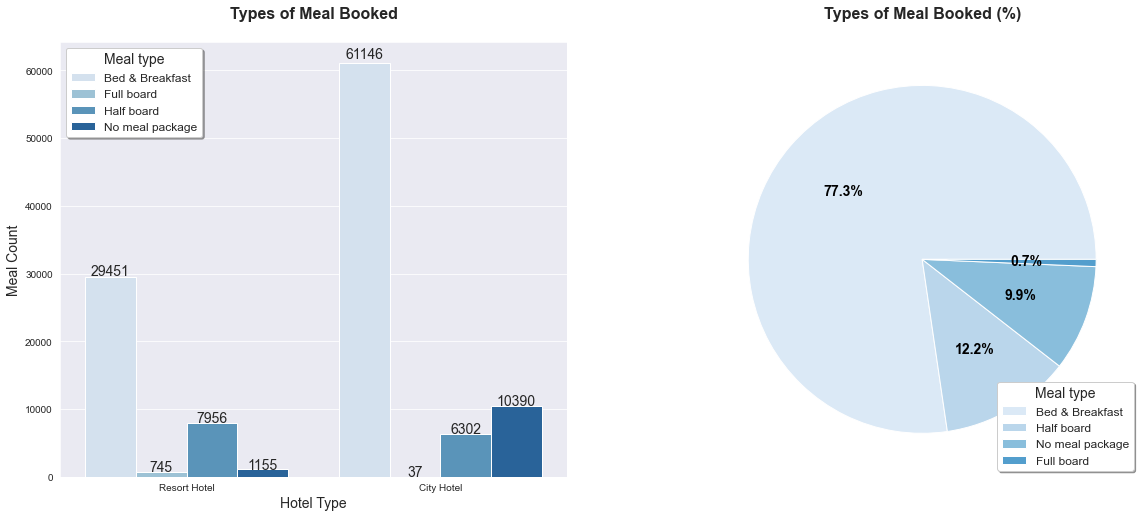

In [26]:
plt.figure(figsize=(20, 8))

# Fig 01
plt.subplot(1, 2, 1)
sns.set_style("whitegrid")
temp = sns.countplot(
    data=data,
    x="hotel",
    hue="meal",
    palette=THEME["sns1"],
)
sns_show_values(temp, roundup=True)
plt.title(
    "Types of Meal Booked\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Meal Count", fontsize=14)
plt.legend(
    ["Bed & Breakfast", "Full board", "Half board", "No meal package"],
    title="Meal type",
    shadow=True,
    fontsize=12,
    title_fontsize=14,
    loc="upper left"
)

# Fig 02
plt.subplot(1, 2, 2)
plt.pie(
    data.meal.value_counts(),
    autopct="%.1f%%",
    colors=sns.color_palette(THEME["sns1"]),
    textprops={"fontsize": 14, "color": "black", "fontweight": "bold"}
)
plt.title(
    "Types of Meal Booked (%)\n",
    fontweight="bold", fontsize=16
)
plt.legend(
    ["Bed & Breakfast", "Half board", "No meal package", "Full board"],
    title="Meal type", shadow=True,
    loc="lower right",
    fontsize=12,
    title_fontsize=14
)
if SAVEFIG: plt.savefig("rev8.png", dpi=300)
plt.show()

Bed & Breakfast seems to be the most popular choice among guest for both hotels (77.3%) while Full board meal option seems to be the least prefered (0.7%).

### **Booking Cancelation**

In [27]:
# Calculate
total_cancel = data["is_canceled"].sum()
rh_cancel = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancel = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

# Percentage form:
p_cancel = total_cancel / data.shape[0] * 100
rh_p_cancel = rh_cancel / data.loc[data["hotel"] == "Resort Hotel"].shape[0] * 100
ch_p_cancel = ch_cancel / data.loc[data["hotel"] == "City Hotel"].shape[0] * 100

# Output
print(f"""\
[b]Total bookings canceled: {total_cancel:,} ({p_cancel:.0f}%)[/]
[b]Resort hotel[/] bookings canceled: {rh_cancel:,} ({rh_p_cancel:.0f}%)
[b]City hotel[/] bookings canceled: {ch_cancel:,} ({ch_p_cancel:.0f}%)
""")

Total bookings canceled: 43,929 (37%)
Resort hotel bookings canceled: 11,038 (28%)
City hotel bookings canceled: 32,891 (42%)

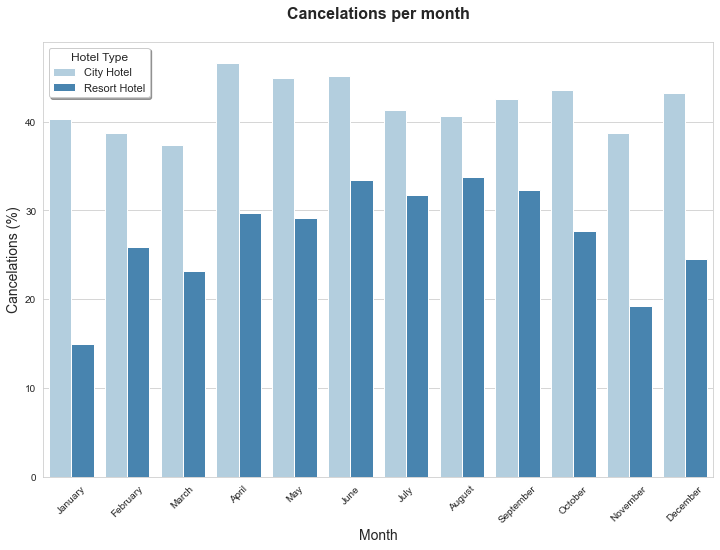

In [28]:
# Make separated data

# Resort Hotel
rh_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
rh_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()
rh_cancel_dat = pd.DataFrame({
    "Hotel": "Resort Hotel",
    "Month": list(rh_book_per_month.index),
    "Bookings": list(rh_book_per_month.values),
    "Cancelations": list(rh_cancel_per_month.values)
})
# City Hotel
ch_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
ch_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()
ch_cancel_dat = pd.DataFrame({
    "Hotel": "City Hotel",
    "Month": list(ch_book_per_month.index),
    "Bookings": list(ch_book_per_month.values),
    "Cancelations": list(ch_cancel_per_month.values)
})
# Concat data
full_cancel_dat = pd.concat([rh_cancel_dat, ch_cancel_dat],
                             ignore_index=True)
full_cancel_dat["cancel_percent"] = full_cancel_dat["Cancelations"] \
                                  / full_cancel_dat["Bookings"] * 100
# Order by month
full_cancel_dat.Month = pd.Categorical(
    full_cancel_dat.Month,
    categories=MONTH,
    ordered=True
)

# Bar chart
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(
    x="Month",
    y="cancel_percent",
    hue="Hotel",
    hue_order = ["City Hotel", "Resort Hotel"],
    data=full_cancel_dat,
    palette=THEME["sns1"]
)
plt.title(
    "Cancelations per month\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Cancelations (%)", fontsize=14)
plt.legend(
    title="Hotel Type",
    shadow=True,
    loc="upper left",
    fontsize=11,
    title_fontsize=12
)
if SAVEFIG: plt.savefig("can1.png", dpi=300)
plt.show()

City Hotel had the number of cancelations stayed at around 40% throughout the year (peaked at nearly 50% in April), while that of Resort Hotel is highest in the summer (peaked at approximately 35%) and lowest (bottomed at approximately 15%) during the winter.

### **Pricing Analysis**

In [29]:
# Take only booking of each Hotel type and
# no cancelation booking into further consideration

# Resort Hotel
rh = data.loc[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
# City Hotel
ch = data.loc[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

print(rh.shape, ch.shape)

(28269, 36)
(44984, 36)

In [30]:
# Assuming the currency is in EUR since most of the guest are from Euroupe
# Check average price
_rh_pmean = rh.price_per_guest.mean()
_ch_pmean = ch.price_per_guest.mean()
print(f"""\
[b]The average prices from all non-canceled bookings:[/]
Resort Hotel: EUR {_rh_pmean:,.2f} per night per person.
City Hotel: EUR {_ch_pmean:,.2f} per night per person.
""")

The average prices from all non-canceled bookings:
Resort Hotel: EUR 48.59 per night per person.
City Hotel: EUR 60.60 per night per person.

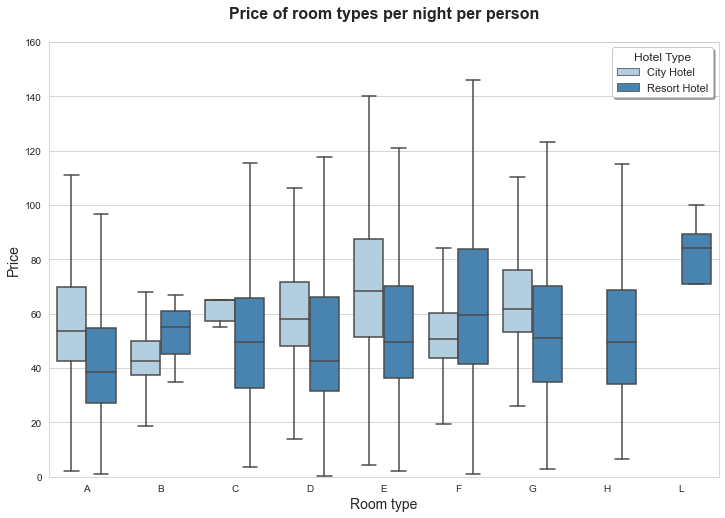

In [31]:
# Make separated data

# Take out non-canceled booking
guest_dat = data.loc[data.is_canceled == 0]
room_prices = guest_dat[["hotel", "reserved_room_type", "price_per_guest"]].sort_values("reserved_room_type")

# Boxplot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.boxplot(
    x="reserved_room_type",
    y="price_per_guest",
    hue="hotel",
    data=room_prices, 
    hue_order=["City Hotel", "Resort Hotel"],
    fliersize=0,
    palette=THEME["sns1"]
)
plt.title(
    "Price of room types per night per person\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Room type", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(
    title="Hotel Type", shadow=True,
    loc="upper right",
    fontsize=11, title_fontsize=12
)
plt.ylim(0, 160)
if SAVEFIG: plt.savefig("pri1.png", dpi=300)
plt.show()

As for City Hotel, averagely room type B has the lowest price and room type E has the highest price. Resort Hotel has the lowest price for room type A and highest price for room type L.

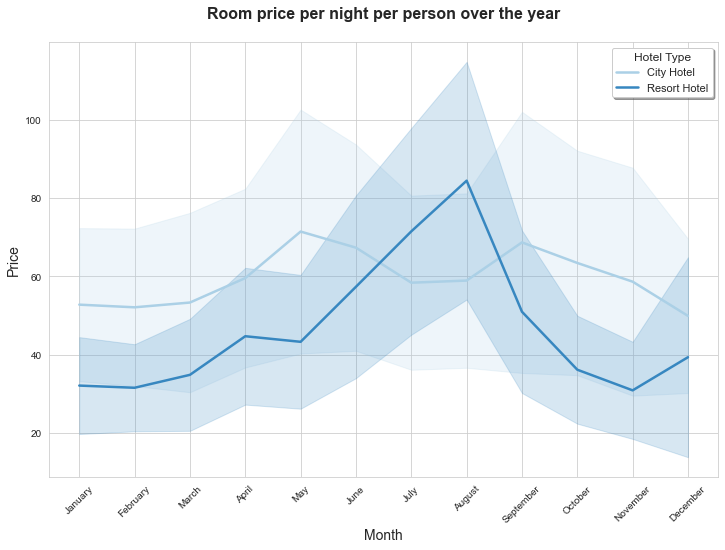

In [32]:
# Make separated data
room_prices_m = guest_dat[["hotel", "arrival_date_month", "price_per_guest"]].sort_values("arrival_date_month")
room_prices_m["arrival_date_month"] = pd.Categorical(
    room_prices_m["arrival_date_month"],
    categories=MONTH, ordered=True
)

# Line graph with standard deviation
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(
    x="arrival_date_month",
    y="price_per_guest",
    hue="hotel", 
    data=room_prices_m, 
    hue_order = ["City Hotel", "Resort Hotel"],
    ci="sd",
    size="hotel",
    sizes=(2.5, 2.5),
    palette=THEME["sns1"]
)
plt.title(
    "Room price per night per person over the year\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=14)
plt.legend(
    title="Hotel Type",
    shadow=True, loc="upper right",
    fontsize=11, title_fontsize=12
)
if SAVEFIG: plt.savefig("pri2.png", dpi=300)
plt.show()

This clearly shows that the prices in the Resort Hotel are much higher during the summer (peaked at more than EUR 80). The price of the City Hotel is more stable (around EUR 60) and is most expensive during spring and autumn (EUR 70).

### **Stay Duration**

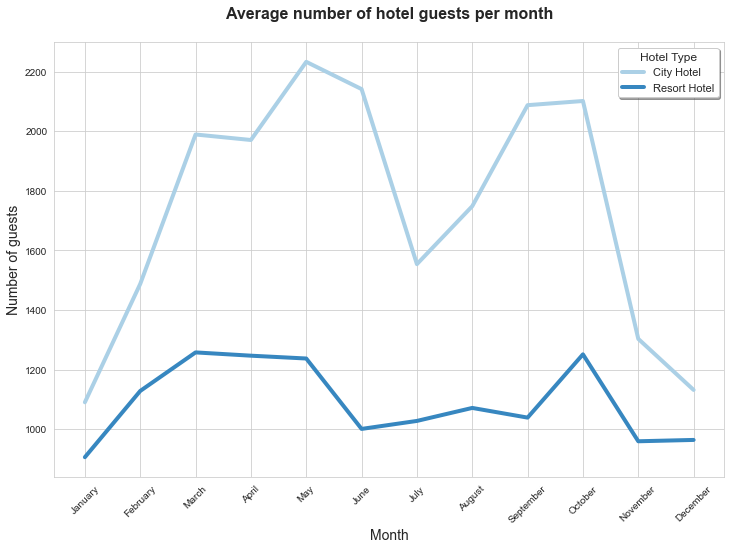

In [33]:
# Make separated data

# Resort Hotel
rh_guests_m = rh.groupby("arrival_date_month")["hotel"].count()
rh_guest_dat = pd.DataFrame({
    "month": list(rh_guests_m.index),
    "hotel": "Resort Hotel", 
    "guests": list(rh_guests_m.values)
})
# City Hotel
ch_guests_m = ch.groupby("arrival_date_month")["hotel"].count()
ch_guest_dat = pd.DataFrame({
    "month": list(ch_guests_m.index),
    "hotel": "City Hotel", 
    "guests": list(ch_guests_m.values)
})
# Concat data
full_guest_dat = pd.concat([rh_guest_dat, ch_guest_dat], ignore_index=True)
# Order by month
full_guest_dat.month = pd.Categorical(
    full_guest_dat.month,
    categories=MONTH, ordered=True
)
# Normalize data due to July & August has data of 3 years
full_guest_dat.loc[(full_guest_dat["month"] == "July") | (full_guest_dat["month"] == "August"), "guests"] /= 3
full_guest_dat.loc[~((full_guest_dat["month"] == "July") | (full_guest_dat["month"] == "August")), "guests"] /= 2

# Line Graph
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(
    x="month", 
    y="guests",
    hue="hotel",
    data=full_guest_dat, 
    hue_order=["City Hotel", "Resort Hotel"],
    size="hotel",
    sizes=(4, 4),
    palette=THEME["sns1"]
)
plt.title(
    "Average number of hotel guests per month\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=14)
plt.legend(
    title="Hotel Type",
    shadow=True, loc="upper right",
    fontsize=11, title_fontsize=12
)
if SAVEFIG: plt.savefig("sta1.png", dpi=300)
plt.show()

The City Hotel has more guests during spring and autumn, when the prices are also highest. In July and August there are less visitors, although prices are lower. <br>
Guest numbers for the Resort Hotel go down slighty from June to September, which is also when the prices are highest.<br>
Both hotels have the fewest guests during the winter.

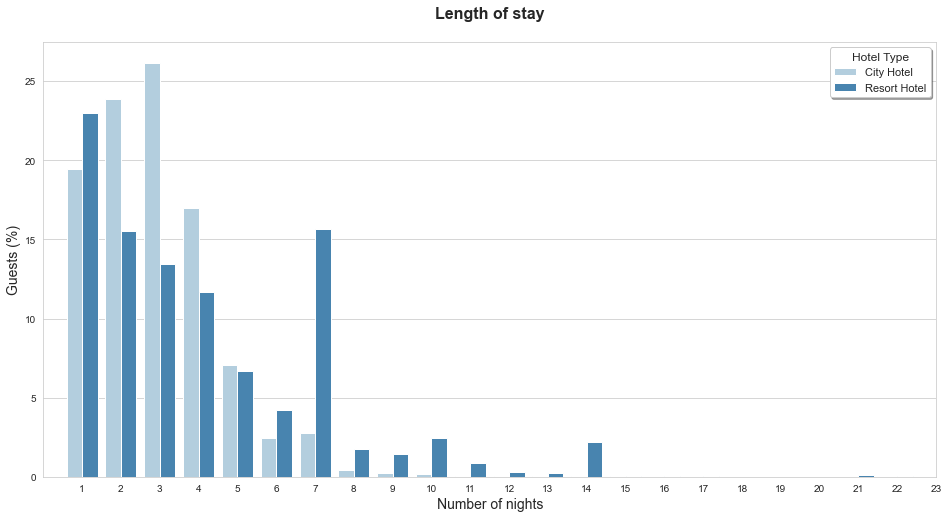

In [34]:
# Make separated data

# Resort Hotel
num_night_rh = list(rh.total_nights.value_counts().index)
num_book_rh = list(rh.total_nights.value_counts())
p_book_rh = rh.total_nights.value_counts() / sum(num_book_rh) * 100 # Convert to percentage
rh_night = pd.DataFrame({
    "hotel": "Resort Hotel",
    "num_nights": num_night_rh,
    "p_num_bookings": p_book_rh
})
# City Hotel
num_night_ch = list(ch.total_nights.value_counts().index)
num_book_ch = list(ch.total_nights.value_counts())
p_book_ch = ch.total_nights.value_counts() / sum(num_book_ch) * 100 # Convert to percentage
ch_night = pd.DataFrame({
    "hotel": "City Hotel",
    "num_nights": num_night_ch,
    "p_num_bookings": p_book_ch
})
# Concat data
night_dat = pd.concat(
    [rh_night, ch_night],
    ignore_index=True
)

# Bar chart
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.barplot(
    x="num_nights",
    y="p_num_bookings",
    hue="hotel",
    data=night_dat,
    hue_order = ["City Hotel", "Resort Hotel"],
    palette=THEME["sns1"]
)
plt.title(
    "Length of stay\n",
    fontweight="bold", fontsize=16
)
plt.xlabel("Number of nights", fontsize=14)
plt.ylabel("Guests (%)", fontsize=14)
plt.legend(loc="upper right")
plt.xlim(-1, 22)
plt.legend(
    title="Hotel Type",
    shadow=True,
    loc="upper right",
    fontsize=11,
    title_fontsize=12
)
if SAVEFIG: plt.savefig("sta2.png", dpi=300)
plt.show()

Both guests from City Hotel and Resort Hotel prefer stay duration from 1 to 4 nights. Additionally, 7 nights also a popular choice for Resort Hotel guests.

In [35]:
_m_night_rh = sum(list((rh_night.num_nights * (rh_night.p_num_bookings/100)).values))
_max_rh = rh_night.num_nights.max()
_m_night_ch = sum(list((ch_night.num_nights * (ch_night.p_num_bookings/100)).values))
_max_ch = ch_night.num_nights.max()
print(f"""\
[b] City Hotel:\t| Resort Hotel:[/]
- avg: {_m_night_ch:.2f}\t[b]|[/] - avg: {_m_night_rh:.2f}
- max: {_max_ch}\t[b]|[/] - max: {_max_rh}
""")

 City Hotel:    | Resort Hotel:
- avg: 2.95     | - avg: 4.20
- max: 34       | - max: 69

In [36]:
print(f"""\
On average, guests of the [b]City hotel[/] stay {_m_night_ch:.2f} nights, and {_max_ch} at maximum.
On average, guests of the [b]Resort hotel[/] stay {_m_night_rh:.2f} nights, and {_max_rh} at maximum.
""")

On average, guests of the City hotel stay 2.95 nights, and 34 at maximum.
On average, guests of the Resort hotel stay 4.20 nights, and 69 at maximum.

### **Market Segment**

In [37]:
# Make separated data
segments = data["market_segment"].value_counts()

# Pie chart
temp = px.pie(
  segments,
  values=segments.values,
  names=segments.index,
  title="Bookings per market segment",
  color_discrete_sequence=px.colors.sequential.Blues_r,
)
temp.update_traces(rotation=-90,
                   textinfo="value+percent+label")
temp.update_layout(font=dict(size=16))
temp.show()

Booking through Online Travel Agents seem to be the popular choice.

In [38]:
temp = px.pie(
    data, 
    values=data.customer_type.value_counts(), 
    names=data.customer_type.unique(), 
    title="Customer segment of bookings",
    color_discrete_sequence=px.colors.sequential.Blues_r
)
temp.update_traces(rotation=180,
                   textinfo="value+percent+label",
                   pull=[0.1, 0, 0, 0])
temp.update_layout(font=dict(size=16))
temp.show()

Most of guests are transient which accounts for 75% of the bookings, while booking in group seems to be a neglected option.

## **Summary:**
---

- Rooms are mostly booked in a period from March to October and during this time, the guests on average stay 3-4 nights.
- Both hotels have the fewest guests during the winter.
- Most of the guests are from Portugal and other countries in Europe.
- Booking cancellations occupied 37% of the total reservation; most of the cancellations were from City Hotel.
- Booking through online travel agents seems to be the popular choice.
- Most of the guests are transient.

## **Recommendations:**
---

- From May to October, raise the room rates for guests staying 3 nights or more
- From October to January, lower the rates or give out more promotions.
- More services targeting guests from the EU, especially from Portugal.
- Set non-refundable rates, collect deposits, and implement more rigid cancellation policies to reduce high rate of cancellations.
- Collaborate with online travel agents to offer special discounts for guests booking through them.
- Lower rates for non-transient guests to attract them more.

## **Credits:**
---

Data retrieved from [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)